In [2]:
#import necessary library
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Eq, solve

In [3]:
#Author: Bralyne Vanessa Matoukam
def intermediatestate_h1(h_l,h_r,u_l,u_r):
    g=10
    #LR RR (explicit)
    h= (1/(16*g))*(u_l-u_r+2*np.sqrt(g)*(np.sqrt(h_l) + np.sqrt(h_r)))**2
    return h
def intermediatestate_h2(h_l,h_r,u_l,u_r):
    #LS RR (implicit)
    def f_1(h,h_l,h_r,u_l,u_r):
        g=10
        eq1=2*np.sqrt(g)*(np.sqrt(h) - np.sqrt(h_r)) + (h-h_l)*np.sqrt(g/2)*np.sqrt(1/h + 1/h_l) + u_r - u_l
        return eq1
    def f_2(h,h_l,h_r,u_l,u_r):
        g=10
        eq2=np.sqrt(g/h) + np.sqrt(g/2)*(np.sqrt(1/h + 1/h_l) -0.5*(h-h_l)*(h**(-2))*(1/h + 1/h_l)**(-0.5))
        return eq2
    # Newton-Raphson Algorithm
    nmax=20 #set max iterations
    tol = np.exp(-20 )# Tolerance
    i = 0  # Initialisation of Iteration counter
    h_0=h_l#set initial iteration value
    while abs(f_1(h_0,h_l,h_r,u_l,u_r))>tol or i>nmax:
        i=i+1
        h_i = h_0-f_1(h_0,h_l,h_r,u_l,u_r)/f_2(h_0,h_l,h_r,u_l,u_r)  # Newton-Raphson equation
        h_0=h_i
        return h_0
def intermediatestate_h3(h_l,h_r,u_l,u_r):
    #LS RS (implicit)
    def f_1(h,h_l,h_r,u_l,u_r):
        g=10
        eq1=(h-h_l)*np.sqrt(0.5*g)*np.sqrt(1/h + 1/h_l) + (h-h_r)*np.sqrt(g/2)*np.sqrt(1/h + 1/h_r) + u_r - u_l
        return eq1
    def f_2(h,h_l,h_r,u_l,u_r):
        g=10
        eq2= np.sqrt(0.5*g)*(np.sqrt(1/h + 1/h_l) - 0.5*(h-h_l)*(h**(-2))*(1/h + 1/h_l)**(-0.5) +
                             np.sqrt(1/h + 1/h_r) - 0.5*(h-h_r)*(h**(-2))*(1/h + 1/h_r)**(-0.5))
        return eq2
    # Newton-Raphson Algorithm
    nmax=20 #set max iterations
    tol = np.exp(-20 )# Tolerance
    i = 0  # Initialisation of Iteration counter
    h_0=h_l#set initial iteration value
    while abs(f_1(h_0,h_l,h_r,u_l,u_r))>tol or i>nmax:
        i=i+1
        h_i = h_0-f_1(h_0,h_l,h_r,u_l,u_r)/f_2(h_0,h_l,h_r,u_l,u_r)  # Newton-Raphson equation
        h_0=h_i
    return h_0
def intermediatestate_h4(h_l,h_r,u_l,u_r):
    #LR RS (implicit)
    def f_1(h,h_l,h_r,u_l,u_r):
        g=10
        eq1=2*np.sqrt(g)*(np.sqrt(h) - np.sqrt(h_l)) + (h-h_r)*np.sqrt(g/2)*np.sqrt(1/h + 1/h_r) + u_r - u_l
        return eq1
    def f_2(h,h_l,h_r,u_l,u_r):
        g=10
        eq2= np.sqrt(g/h) + np.sqrt(g/2)*(np.sqrt(1/h + 1/h_r) -0.5*(h-h_r)*(h**(-2))*(1/h + 1/h_r)**(-0.5))
        return eq2
    # Newton-Raphson Algorithm
    nmax=20 #set max iterations
    tol = np.exp(-20 )# Tolerance
    i = 0  # Initialisation of Iteration counter
    h_0=h_l#set initial iteration value
    while abs(f_1(h_0,h_l,h_r,u_l,u_r))>tol or i>nmax:
        i=i+1
        h_i = h_0-f_1(h_0,h_l,h_r,u_l,u_r)/f_2(h_0,h_l,h_r,u_l,u_r)  # Newton-Raphson equation
        h_0=h_i
    return h_0
def solution_Riemann(h_l,h_r,u_l,u_r,t):
    n=50
    g=10
    if t==0:
        x=[-n,0,0,n]
        h=[h_l,h_l,h_r,h_r]
        u=[u_l,u_l,u_r,u_r]
        f = plt.figure(figsize = (15,2))
        ax1=f.add_subplot(121) # row 1, col 2 index 1
        b=ax1.plot(x,h)
        plt.title("h at time $t=0$")
        plt.xlabel('x ')
        plt.ylabel('h ')
        ax2=f.add_subplot(122) # index 2
        c=ax2.plot(x,u)
        plt.title("u at time $t=0$")
        plt.xlabel('x ')
        plt.ylabel('u ')
        return b, c
    else: 
        if intermediatestate_h1(h_l,h_r,u_l,u_r)<h_l and intermediatestate_h1(h_l,h_r,u_l,u_r)<h_r: #LR RR
            u=0.5*(u_l+u_r)+0.5*2*np.sqrt(g)*(np.sqrt(h_l)-np.sqrt(h_r))
            S_l_head = u_l - np.sqrt(g*h_l)
            S_l_tail = u - np.sqrt(g*intermediatestate_h1(h_l,h_r,u_l,u_r))
            S_r_tail = u + np.sqrt(g*intermediatestate_h1(h_l,h_r,u_l,u_r))
            S_r_head = u_r + np.sqrt(g*h_r)
            x=symbols('x')
            l_h1=(1/(9*g))*((u_l + 2*np.sqrt(g*h_l) - x/t)**2)-intermediatestate_h1(h_l,h_r,u_l,u_r)
            l_h2=(1/(9*g))*((u_l + 2*np.sqrt(g*h_l) - x/t)**2)-h_l
            r_h1=(1/(9*g))*(x/t - u_r + 2*np.sqrt(g*h_r))**2-intermediatestate_h1(h_l,h_r,u_l,u_r)
            r_h2=(1/(9*g))*(x/t - u_r + 2*np.sqrt(g*h_r))**2-h_r
            l_u=u_l + 2*(np.sqrt(g*h_l) - (u_l + 2*np.sqrt(g*h_l) - x/t)/3)-u
            r_u=u_r + 2*((1/3)*(x/t - u_r + 2*np.sqrt(g*h_r)) - np.sqrt(g*h_r))-u
            x_11=solve(l_h1)
            x_12=solve(l_h2)
            x_21=solve(r_h1)
            x_22=solve(r_h2)
            x_3=solve(l_u)
            x_4=solve(r_u)
            x_1=[-n]
            x_2=[-n,S_l_head*t,x_3[0],x_4[0],S_r_head*t,n]
            h=[h_l,h_l,intermediatestate_h1(h_l,h_r,u_l,u_r),intermediatestate_h1(h_l,h_r,u_l,u_r),h_r,h_r]
            u1=[u_l,u_l,u,u,u_r,u_r]
            x_1.append(min(x_12))
            x_1.append(min(x_11))
            x_1.append(max(x_21))
            x_1.append(max(x_22))
            x_1.append(n)
            f = plt.figure(figsize = (15,2))
            ax1=f.add_subplot(121) # row 1, col 2 index 1
            b=ax1.plot(x_1,h)
            plt.title("h at time $t=2$ ")
            plt.xlabel('x ')
            plt.ylabel('h ')
            ax2=f.add_subplot(122) # index 2
            c=ax2.plot(x_2,u1)
            plt.title("u at time $t=2$")
            plt.xlabel('x ')
            plt.ylabel('u ')
            return b,c
        elif intermediatestate_h2(h_l,h_r,u_l,u_r)>=h_l and intermediatestate_h2(h_l,h_r,u_l,u_r)<h_r :#LS RR
            u=0.5*(u_l+u_r) + 0.5*(2*np.sqrt(g)*(np.sqrt(intermediatestate_h2(h_l,h_r,u_l,u_r)) -
                                         np.sqrt(h_r)) -(intermediatestate_h2(h_l,h_r,u_l,u_r)-h_l)*
                           np.sqrt(g/2)*np.sqrt(1/intermediatestate_h2(h_l,h_r,u_l,u_r) + 1/h_l))
            S_l = u_l - (1/h_l)*np.sqrt(g/2)*np.sqrt(h_l*intermediatestate_h2(h_l,h_r,u_l,u_r)*
                                                     (h_l+ intermediatestate_h2(h_l,h_r,u_l,u_r)))
            S_r_tail = u + np.sqrt(g*intermediatestate_h2(h_l,h_r,u_l,u_r))
            S_r_head = u_r + np.sqrt(g*h_r)
            x=symbols('x')
            r_h1=(1/(9*g))*(x/t - u_r + 2*np.sqrt(g*h_r))**2-intermediatestate_h2(h_l,h_r,u_l,u_r)
            r_h2=(1/(9*g))*(x/t - u_r + 2*np.sqrt(g*h_r))**2-h_r
            r_u=u_r + 2*((1/3)*(x/t - u_r + 2*np.sqrt(g*h_r)) - np.sqrt(g*h_r))-u
            x_21=solve(r_h1)
            x_22=solve(r_h2)
            x_3=solve(r_u)
            h=[h_l,h_l,intermediatestate_h2(h_l,h_r,u_l,u_r),intermediatestate_h2(h_l,h_r,u_l,u_r),h_r,h_r]
            u1=[u_l,u_l,u,u,u_r,u_r]
            x=[-n,S_l*t,S_l*t,S_r_tail*t,S_r_head*t,n]
            f = plt.figure(figsize = (15,2))
            ax1=f.add_subplot(121) # row 1, col 2 index 1
            b=ax1.plot(x,h)
            plt.title("h at time $t=1$ ")
            plt.xlabel('x ')
            plt.ylabel('h ')
            ax2=f.add_subplot(122) # index 2
            c=ax2.plot(x,u1)
            plt.title("u at time $t=1$")
            plt.xlabel('x ')
            plt.ylabel('u ')
            return b,c
        elif intermediatestate_h4(h_l,h_r,u_l,u_r)<h_l and intermediatestate_h4(h_l,h_r,u_l,u_r)>=h_r :#LR RS
            u= 0.5*(u_l+u_r) + 0.5*((intermediatestate_h4(h_l,h_r,u_l,u_r)-h_r)*
                            np.sqrt(g/2)*np.sqrt(1/intermediatestate_h4(h_l,h_r,u_l,u_r) + 1/h_r) -
                            2*np.sqrt(g)*(np.sqrt(intermediatestate_h4(h_l,h_r,u_l,u_r)) - np.sqrt(h_l)))
            S_l_head = u_l - np.sqrt(g*h_l)
            S_l_tail = u - np.sqrt(g*intermediatestate_h4(h_l,h_r,u_l,u_r))
            S_r = u_r + (1/h_r)*np.sqrt(g/2)*np.sqrt(h_r*intermediatestate_h4(h_l,h_r,u_l,u_r)*
                                               (h_r+intermediatestate_h4(h_l,h_r,u_l,u_r)))
            
            h=[h_l,h_l,intermediatestate_h4(h_l,h_r,u_l,u_r),intermediatestate_h4(h_l,h_r,u_l,u_r),h_r,h_r]
            u1=[u_l,u_l,u,u,u_r,u_r]
            x=[-n,S_l_head*t,S_l_tail*t,S_r*t,S_r*t,n]
            f = plt.figure(figsize = (15,2))
            ax1=f.add_subplot(121) # row 1, col 2 index 1
            b=ax1.plot(x,h)
            plt.title("h at time $t=2$ ")
            plt.xlabel('x ')
            plt.ylabel('h ')
            ax2=f.add_subplot(122) # index 2
            c=ax2.plot(x,u1)
            plt.title("u at time $t=2$")
            plt.xlabel('x ')
            plt.ylabel('u ')
            return b,c
        elif intermediatestate_h3(h_l,h_r,u_l,u_r)>=h_l and intermediatestate_h3(h_l,h_r,u_l,u_r)>=h_r :#LS RS
            u= 0.5*(u_l+u_r) + 0.5*((intermediatestate_h3(h_l,h_r,u_l,u_r)-h_r)*np.sqrt(g/2)*
                            np.sqrt(1/intermediatestate_h3(h_l,h_r,u_l,u_r) + 1/h_r) -
                          (intermediatestate_h3(h_l,h_r,u_l,u_r)-h_l)*np.sqrt(g/2)*
                            np.sqrt(1/intermediatestate_h3(h_l,h_r,u_l,u_r) + 1/h_l))
            S_l = u_l - (1/h_l)*np.sqrt(g/2)*np.sqrt(h_l*intermediatestate_h3(h_l,h_r,u_l,u_r)*
                                                     (h_l+ intermediatestate_h3(h_l,h_r,u_l,u_r)))
            S_r = u_r + (1/h_r)*np.sqrt(g/2)*np.sqrt(h_r*intermediatestate_h3(h_l,h_r,u_l,u_r)*
                                               (h_r+intermediatestate_h3(h_l,h_r,u_l,u_r)))
            h=[h_l,h_l,intermediatestate_h3(h_l,h_r,u_l,u_r),intermediatestate_h3(h_l,h_r,u_l,u_r),h_r,h_r]
            u1=[u_l,u_l,u,u,u_r,u_r]
            x=[-n,S_l*t,S_l*t,S_r*t,S_r*t,n]
            f = plt.figure(figsize = (15,2))
            ax1=f.add_subplot(121) # row 1, col 2 index 1
            b=ax1.plot(x,h)
            plt.title("h at time $t=1$ ")
            plt.xlabel('x ')
            plt.ylabel('h ')
            ax2=f.add_subplot(122) # index 2
            c=ax2.plot(x,u1)
            plt.title("u at time $t=1$")
            plt.xlabel('x ')
            plt.ylabel('u ')
            return b,c

        

([<matplotlib.lines.Line2D at 0x7f495c160040>],
 [<matplotlib.lines.Line2D at 0x7f495c0ee7f0>])

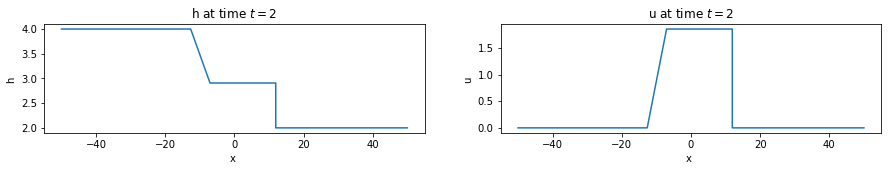

In [4]:
solution_Riemann(4,2,0,0,2)